# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.6.0-alpha.fix.120'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
164921,2020-07-26,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164922,2020-07-27,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164923,2020-07-28,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164924,2020-07-29,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164925,2020-07-30,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
164921,2020-07-26,Colombia,Vichada,2,1,0,1
164922,2020-07-27,Colombia,Vichada,2,1,0,1
164923,2020-07-28,Colombia,Vichada,2,1,0,1
164924,2020-07-29,Colombia,Vichada,2,1,0,1
164925,2020-07-30,Colombia,Vichada,2,1,0,1


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
193,2020-07-26,11214,2920,328,7966
194,2020-07-27,11345,2893,328,8124
195,2020-07-28,11611,2819,328,8464
196,2020-07-29,11861,2774,329,8758
197,2020-07-30,12228,3141,329,8758


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-26,16276213,6299027,650357,9326829,0.019979,0.286517,0.065184
2020-07-27,16469333,3851739,655107,11962487,0.019889,0.363175,0.051920
2020-07-28,16721053,6379153,661282,9680618,0.019774,0.289474,0.063942
2020-07-29,17004916,6455116,667549,9882251,0.019628,0.290570,0.063276
2020-07-30,17006197,6479798,667549,9858850,0.019627,0.289861,0.063417


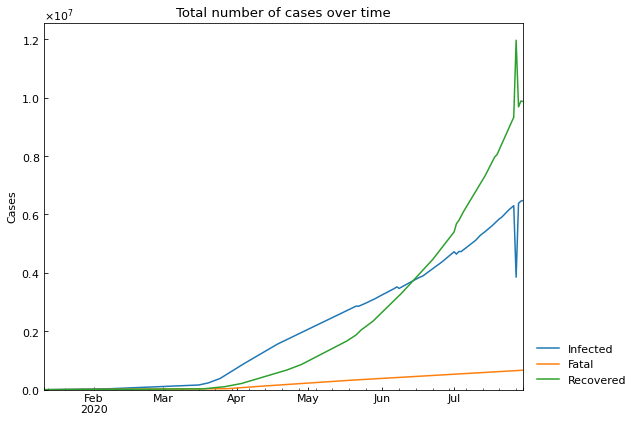

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
197,2020-07-26,30606,7852,997,21757
198,2020-07-27,31203,8094,998,22111
199,2020-07-28,32184,8377,1001,22806
200,2020-07-29,33448,8942,1005,23501
201,2020-07-30,34725,33720,1005,23101


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
166,2020-07-26,29382,6624,996,21762
167,2020-07-27,29969,6857,996,22116
168,2020-07-28,30961,7152,998,22811
169,2020-07-29,31901,7393,1001,23507
170,2020-07-30,33049,7866,1004,24179


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
164921,2020-07-26,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164922,2020-07-27,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164923,2020-07-28,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164924,2020-07-29,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164925,2020-07-30,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
161753,COL,Colombia,Vichada,2020-07-26,107808
161754,COL,Colombia,Vichada,2020-07-27,107808
161755,COL,Colombia,Vichada,2020-07-28,107808
161756,COL,Colombia,Vichada,2020-07-29,107808
161757,COL,Colombia,Vichada,2020-07-30,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
164921,2020-07-26,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164922,2020-07-27,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164923,2020-07-28,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164924,2020-07-29,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
164925,2020-07-30,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
164921,2020-07-26,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
164922,2020-07-27,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
164923,2020-07-28,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
164924,2020-07-29,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
164925,2020-07-30,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
197,2020-07-26,1,1,1,0,0,1,1,3,2,2,1,32.41
198,2020-07-27,1,1,1,0,0,1,1,3,2,2,1,32.41
199,2020-07-28,1,1,1,0,0,1,1,3,2,2,1,32.41
200,2020-07-29,1,1,1,0,0,1,1,3,2,2,1,32.41
201,2020-07-30,1,1,1,0,0,1,1,3,2,2,1,32.41


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
197,2020-07-26,1,1,1,0,0,1,1,3,2,2,1,32.41
198,2020-07-27,1,1,1,0,0,1,1,3,2,2,1,32.41
199,2020-07-28,1,1,1,0,0,1,1,3,2,2,1,32.41
200,2020-07-29,1,1,1,0,0,1,1,3,2,2,1,32.41
201,2020-07-30,1,1,1,0,0,1,1,3,2,2,1,32.41


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

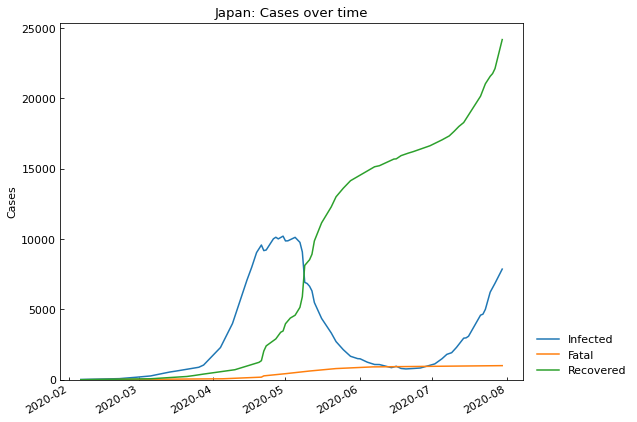

,Date,Confirmed,Infected,Fatal,Recovered
166,2020-07-26,29382,6624,996,21762
167,2020-07-27,29969,6857,996,22116
168,2020-07-28,30961,7152,998,22811
169,2020-07-29,31901,7393,1001,23507
170,2020-07-30,33049,7866,1004,24179


In [26]:
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

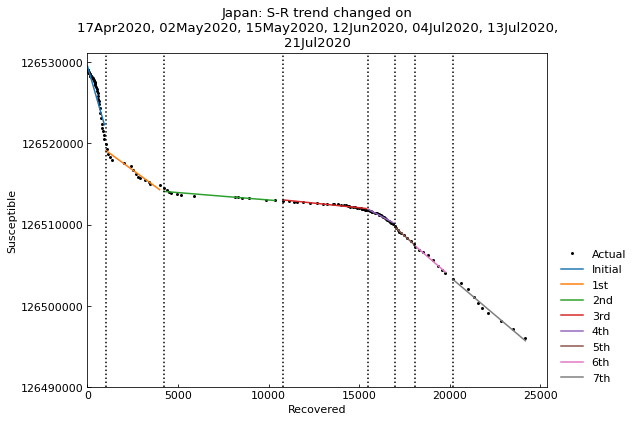

,Type,Start,End,Population
1st,Past,17Apr2020,01May2020,126529100
2nd,Past,02May2020,14May2020,126529100
3rd,Past,15May2020,11Jun2020,126529100
4th,Past,12Jun2020,03Jul2020,126529100
5th,Past,04Jul2020,12Jul2020,126529100
6th,Past,13Jul2020,20Jul2020,126529100
7th,Past,21Jul2020,30Jul2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	7th phase with SIR-F model finished 463 trials in 0 min 20 sec.

	1st phase with SIR-F model finished 118 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 447 trials in 0 min 20 sec.

	3rd phase with SIR-F model finished 98 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 132 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 134 trials in 0 min 5 sec.

	4th phase with SIR-F model finished 1310 trials in 1 min 0 sec.

Completed optimization. Total: 2 min 23 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,17Apr2020,01May2020,126529100,SIR-F,0.013676,0.006063,0.026021,0.000400,480,2.06,0.026,832,24,54,0.149411,118,0 min 5 sec
2nd,Past,02May2020,14May2020,126529100,SIR-F,0.004231,0.020952,0.247156,0.000066,480,0.15,0.247,5033,78,15,0.175439,447,0 min 20 sec
3rd,Past,15May2020,11Jun2020,126529100,SIR-F,0.010328,0.030453,0.035274,0.000691,480,0.32,0.035,482,32,10,0.140502,98,0 min 5 sec
4th,Past,12Jun2020,03Jul2020,126529100,SIR-F,0.024348,0.023188,0.015361,0.000773,480,1.00,0.015,431,13,14,0.124067,1310,1 min 0 sec
5th,Past,04Jul2020,12Jul2020,126529100,SIR-F,0.044964,0.022334,0.000513,0.000109,480,2.00,0.001,3052,7,14,0.039227,132,0 min 5 sec
6th,Past,13Jul2020,20Jul2020,126529100,SIR-F,0.041992,0.024852,0.000495,0.000109,480,1.68,0.000,3052,7,13,0.031056,134,0 min 5 sec
7th,Past,21Jul2020,30Jul2020,126529100,SIR-F,0.046647,0.024882,0.017632,0.000455,480,1.81,0.018,731,7,13,0.074843,463,0 min 20 sec


### Accuracy of estimation

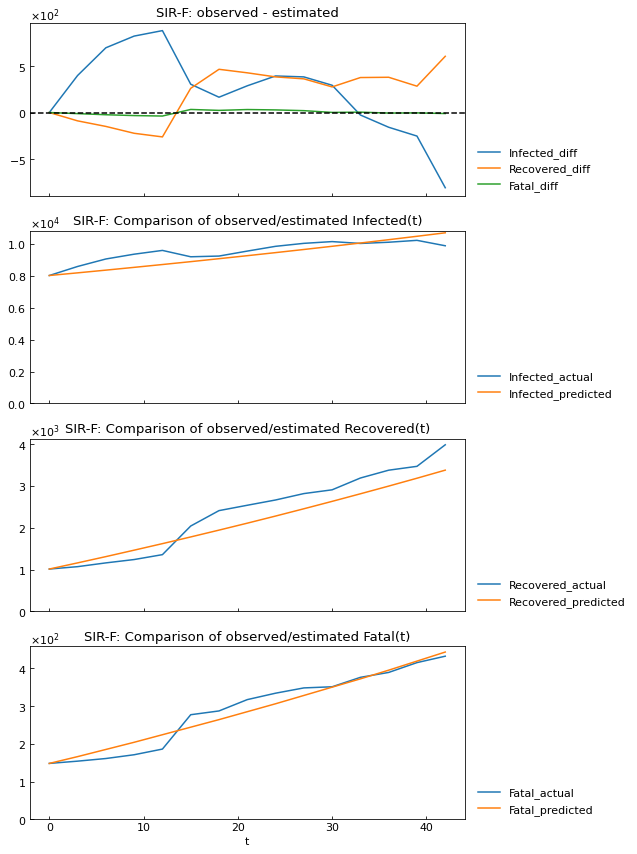

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.0

### Show parameter history

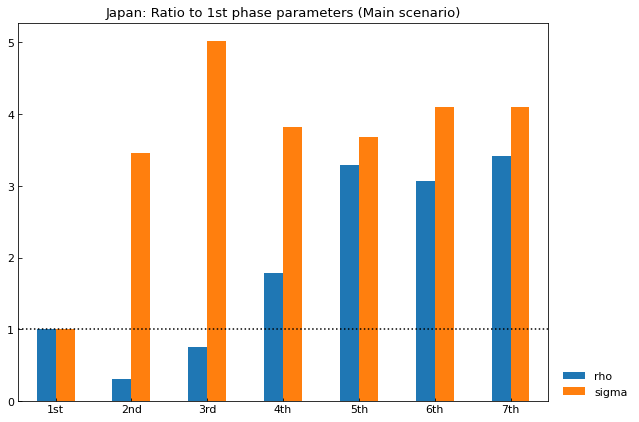

,1st,2nd,3rd,4th,5th,6th,7th
rho,1.0,0.309362,0.755190,1.780419,3.287853,3.070555,3.410951
sigma,1.0,3.455878,5.022943,3.824689,3.683782,4.099106,4.104049


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

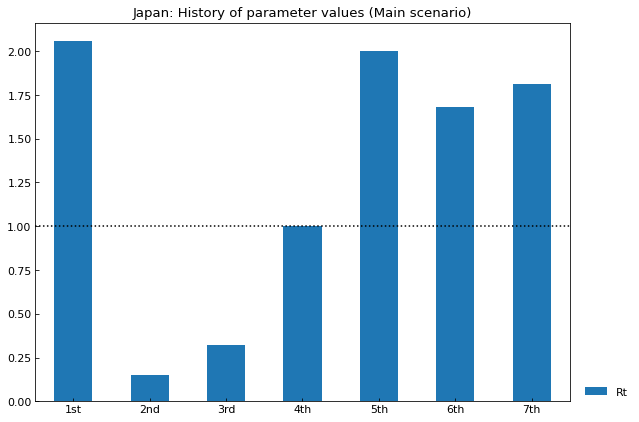

,1st,2nd,3rd,4th,5th,6th,7th
Rt,2.06,0.15,0.32,1.0,2.0,1.68,1.81


In [33]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

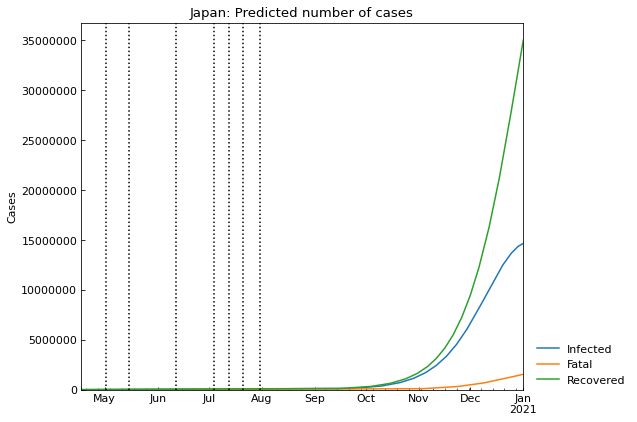

,Date,Fatal,Infected,Recovered,Susceptible
255,28Dec2020,1391592,14210988,31059320,79867200
256,29Dec2020,1433240,14356343,32126517,78613000
257,30Dec2020,1474929,14483455,33203751,77366966
258,31Dec2020,1516588,14591619,34289506,76131387
259,01Jan2021,1544317,14653607,35017079,75314098


In [34]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [35]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.024881544699934043

In [36]:
sigma_new = sigma_current * 2
sigma_new

0.049763089399868086

In [37]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     0th      Past  17Apr2020  01May2020   126529100  SIR-F  0.013676   
         1st      Past  02May2020  14May2020   126529100  SIR-F  0.004231   
         2nd      Past  15May2020  11Jun2020   126529100  SIR-F  0.010328   
         3rd      Past  12Jun2020  03Jul2020   126529100  SIR-F  0.024348   
         4th      Past  04Jul2020  12Jul2020   126529100  SIR-F  0.044964   
         5th      Past  13Jul2020  20Jul2020   126529100  SIR-F  0.041992   
         6th      Past  21Jul2020  30Jul2020   126529100  SIR-F  0.046647   
         7th    Future  31Jul2020  01Jan2021   126529100  SIR-F  0.046647   
Medicine 0th      Past  17Apr2020  01May2020   126529100  SIR-F  0.013676   
         1st      Past  02May2020  14May2020   126529100  SIR-F  0.004231   
         2nd      Past  15May2020  11Jun2020   126529100  SIR-F  0.010328   
         3rd      Past  12Jun2020  03Jul2020   126529100  SIR-F  0.024348   
         4th      Past  04Jul2020  12Jul2020   126529100  SIR-F  0.044964   
         5th      Past  13Jul2020  20Jul2020   126529100  SIR-F  0.041992   
         6th      Past  21Jul2020  30Jul2020   126529100  SIR-F  0.046647   
         7th    Future  31Jul2020  30Aug2020   126529100  SIR-F  0.046647   
         8th    Future  31Aug2020  01Jan2021   126529100  SIR-F  0.046647   

                   sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Scenario Phase                                                        
Main     0th    0.006063  0.026021  0.000400  480  2.06       0.026   
         1st    0.020952  0.247156  0.000066  480  0.15       0.247   
         2nd    0.030453  0.035274  0.000691  480  0.32       0.035   
         3rd    0.023188  0.015361  0.000773  480  1.00       0.015   
         4th    0.022334  0.000513  0.000109  480  2.00       0.001   
         5th    0.024852  0.000495  0.000109  480  1.68       0.000   
         6th    0.024882  0.017632  0.000455  480  1.81       0.018   
         7th    0.024882  0.017632  0.000455  480  1.81       0.018   
Medicine 0th    0.006063  0.026021  0.000400  480  2.06       0.026   
         1st    0.020952  0.247156  0.000066  480  0.15       0.247   
         2nd    0.030453  0.035274  0.000691  480  0.32       0.035   
         3rd    0.023188  0.015361  0.000773  480  1.00       0.015   
         4th    0.022334  0.000513  0.000109  480  2.00       0.001   
         5th    0.024852  0.000495  0.000109  480  1.68       0.000   
         6th    0.024882  0.017632  0.000455  480  1.81       0.018   
         7th    0.024882  0.017632  0.000455  480  1.81       0.018   
         8th    0.049763  0.017632  0.000455  480  0.91       0.018   

                1/alpha2 [day]  1/beta [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     0th               832            24             54   0.149411    118   
         1st              5033            78             15   0.175439    447   
         2nd               482            32             10   0.140502     98   
         3rd               431            13             14   0.124067   1310   
         4th              3052             7             14  0.0392269    132   
         5th              3052             7             13  0.0310558    134   
         6th               731             7             13  0.0748426    463   
         7th               731             7             13          -      -   
Medicine 0th               832            24             54   0.149411    118   
         1st              5033            78             15   0.175439    447   
         2nd               482            32             10   0.140502     98   
         3rd               431            13             14   0.124067   1310   
         4th              3052             7             14  0.0392269

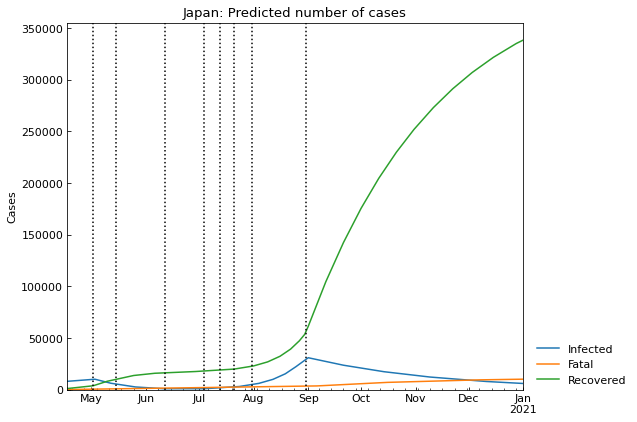

,Date,Fatal,Infected,Recovered,Susceptible
255,28Dec2020,10107,6324,335180,126177489
256,29Dec2020,10131,6239,336118,126176613
257,30Dec2020,10155,6155,337042,126175749
258,31Dec2020,10178,6072,337955,126174896
259,01Jan2021,10194,6017,338557,126174334


In [38]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [39]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 01Jan2021,Fatal on 01Jan2021
Main,14653607,01Jan2021,14653607,1544317
Medicine,31366,31Aug2020,6017,10194
